In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the dataset
url = 'https://zenodo.org/records/5898311/files/vgsales.csv?download=1'
df = pd.read_csv(url)

# Display basic info about the dataset
print('Rows, columns:', df.shape)
print(df.columns.tolist())

# Preview first few rows
df.head()

Rows, columns: (16598, 11)
['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
# Creating a cross-tab to count games for each (Platform × Genre) combination
crosstab = pd.crosstab(df['Platform'], df['Genre'])

# Adding a 'Total' column showing total number of games per platform
crosstab['Total'] = crosstab.sum(axis=1)

# Sort platforms by total number of games
crosstab_sorted = crosstab.sort_values('Total', ascending=False)

# Displaying the top 10 platforms by number of games
print("\nTop 10 Platforms by Total Number of Games:")
print(crosstab_sorted.head(10))



Top 10 Platforms by Total Number of Games:
Genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Platform                                                                
DS           343        240        36   393        92     238      67   
PS2          348        196       150   222       103      18     216   
PS3          380         74        76   124        37       3      92   
Wii          238         84        42   280        58      55      94   
X360         324         47        65   126        24       7     105   
PSP          222        213        74   106        36      44      65   
PS           157         69       108    76        64      32     145   
PC           165         65         6    24        11      25      60   
XB           155         26        48    46        49       7     123   
GBA          167         38        23   110       142      41      64   

Genre     Role-Playing  Shooter  Simulation  Sports  Strategy  Total  
Platform

Top 4 platforms with most games: ['DS', 'PS2', 'PS3', 'Wii']


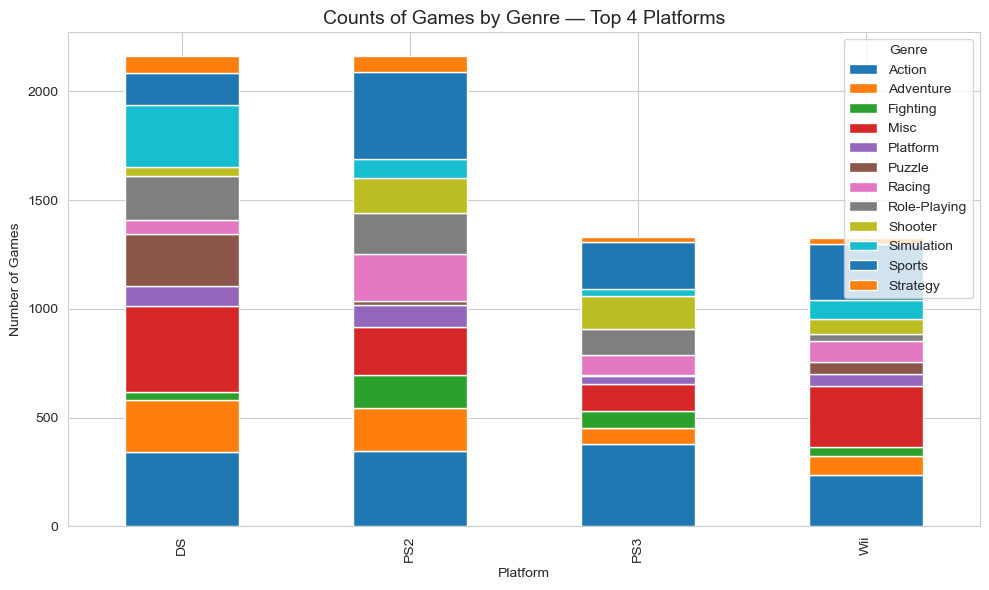

In [19]:
# Identifying the top 4 platforms with the most games
top4_platforms = crosstab_sorted['Total'].nlargest(4).index.tolist()
print('Top 4 platforms with most games:', top4_platforms)

# Extract data for only the top 4 platforms
crosstab_top4 = crosstab_sorted.loc[top4_platforms].drop(columns=['Total'])

# Saving the table for reference
crosstab_top4.to_csv('crosstab_top4_platforms.csv')

# Plottting Game Counts by Genre for Top 4 Platforms
ax = crosstab_top4.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_title('Counts of Games by Genre — Top 4 Platforms', fontsize=14)
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Games')
plt.tight_layout()
plt.savefig('images/CountsTop4.png', dpi=150)
plt.show()

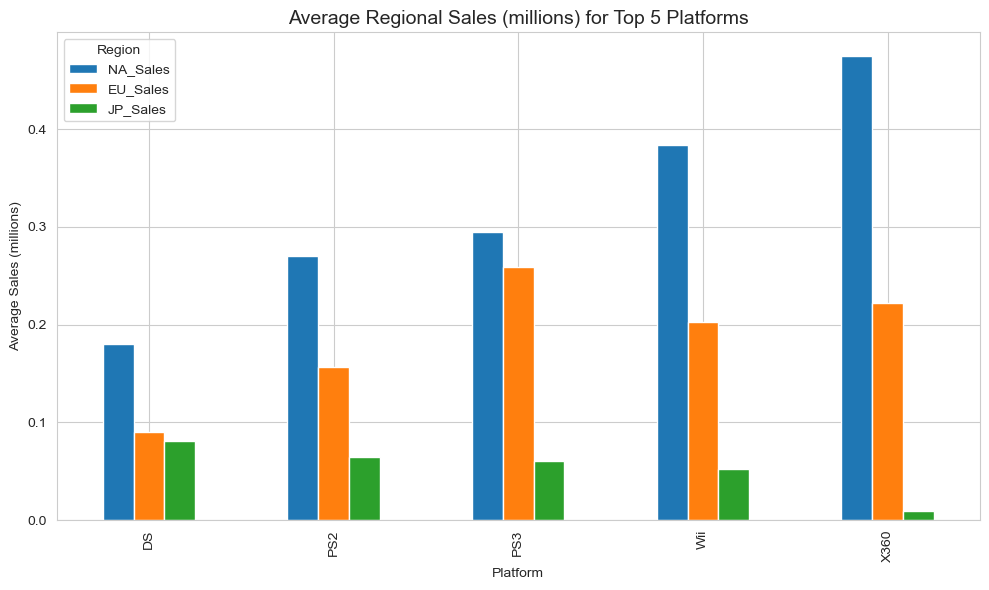

In [20]:
# Average Regional Sales for Top 5 Platforms
# Select regional sales columns
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales']

# Identify the top 5 platforms by number of games
platform_counts = df['Platform'].value_counts()
top5_platforms = platform_counts.nlargest(5).index.tolist()

# Compute mean sales in each region for those top 5 platforms
platform_means = df[df['Platform'].isin(top5_platforms)].groupby('Platform')[sales_cols].mean()
platform_means = platform_means.loc[top5_platforms] # preserve ranking order
platform_means

# Plotting the Average Regional Sales per Platform
platform_means.plot(kind='bar', figsize=(10,6))
plt.title('Average Regional Sales (millions) for Top 5 Platforms', fontsize=14)
plt.ylabel('Average Sales (millions)')
plt.xlabel('Platform')
plt.legend(title='Region')
plt.tight_layout()
plt.savefig('images/PlatformAverageSales.png', dpi=150)
plt.show()

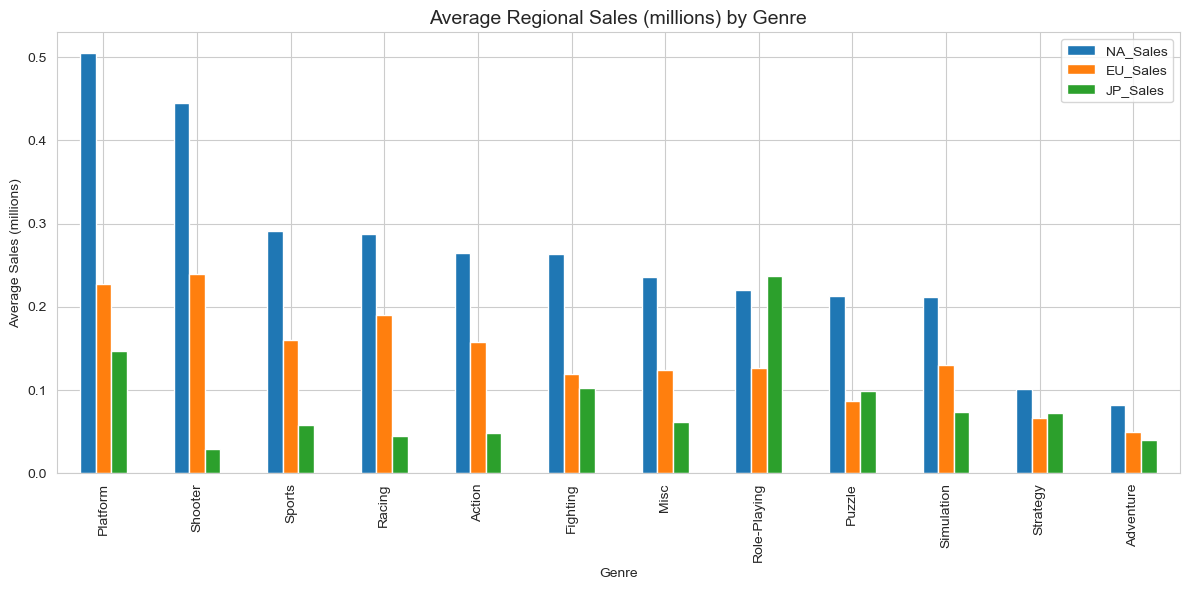

In [21]:
#Calculating Average Regional Sales by Genre
# Compute average sales per region for each genre
genre_means = df.groupby('Genre')[sales_cols].mean()

# Sort by North America sales
genre_means_sorted = genre_means.sort_values('NA_Sales', ascending=False)
genre_means_sorted

# Plotting Average Regional Sales by Genre
genre_means_sorted.plot(kind='bar', figsize=(12,6))
plt.title('Average Regional Sales (millions) by Genre', fontsize=14)
plt.ylabel('Average Sales (millions)')
plt.tight_layout()
plt.savefig('images/GenreAverageSales.png', dpi=150)
plt.show()

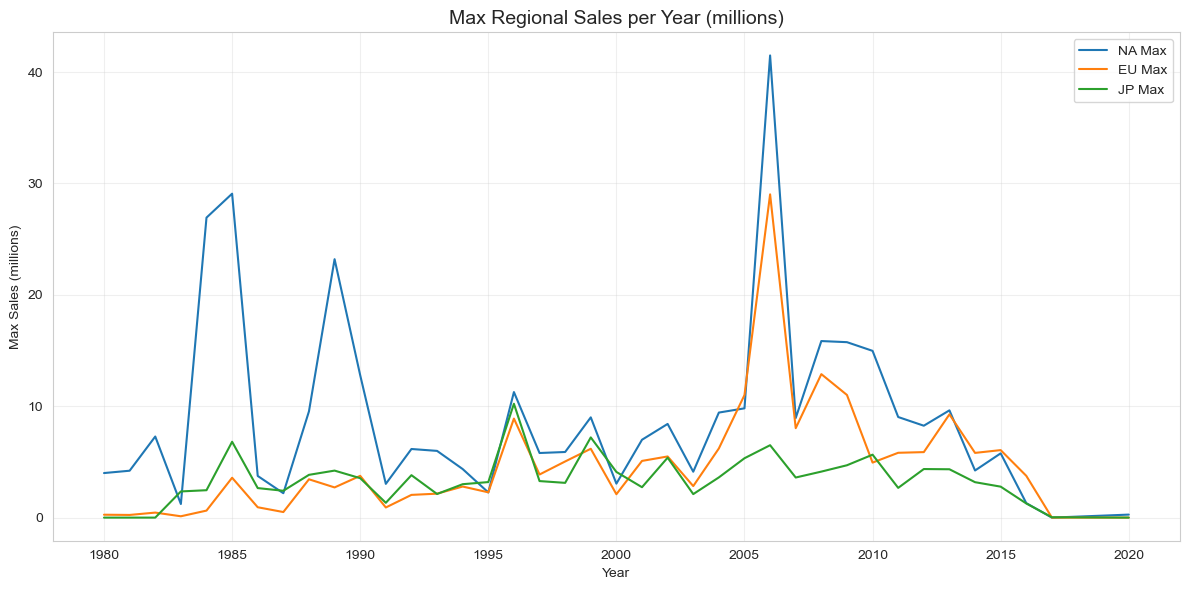

In [22]:
#This code gives us the Sales Trends Over Time
# Convert 'Year' to numeric and handle missing values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 

# Group by Year and calculate mean and max sales for each region
year_group = df.dropna(subset=['Year']).groupby('Year')[sales_cols].agg(['mean', 'max'])

# Flattening column names
year_group.columns = ['_'.join(col).strip() for col in year_group.columns.values]
year_group = year_group.sort_index()
year_group.head()

# Plotting the Maximum Regional Sales per Year
plt.figure(figsize=(12,6))
plt.plot(year_group.index, year_group['NA_Sales_max'], label='NA Max')
plt.plot(year_group.index, year_group['EU_Sales_max'], label='EU Max')
plt.plot(year_group.index, year_group['JP_Sales_max'], label='JP Max')

plt.title('Max Regional Sales per Year (millions)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Max Sales (millions)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('images/MaxSalesperYear.png', dpi=150)
plt.show()

Insights:
- Platforms like DS, PS2, and PS3 dominate in total game releases.
- Nintendo and Sony platforms tend to have broader genre coverage.
- Action and sports are consistently the most common genres across platforms.
- NA and EU show higher average sales compared to Japan.
- Wii and PS3 have notably strong sales across all three regions.
- The Japanese market shows a strong affinity for handheld and role-playing games.
- Shooter and sports games dominate in NA and the EU.
- Role-playing games lead in Japan, reflecting cultural preferences.
- Puzzle and adventure genres tend to sell less globally.
- Max sales spike around 2006–2008, which relates to Wii and DS dominance.
- After 2010, there is a decline in maximum yearly sales as digital distribution grew.
- NA remains the largest market in terms of record-breaking titles